In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from prepare import train_validate_test_split, select_kbest, select_rfe
from explore import plot_univar, plot_variable_pairs, plot_categorical_and_continuous_vars, heat_corr

from sklearn.preprocessing import MinMaxScaler

# modeling methods
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

from pydataset import data

# Modeling Exercises
Select a dataset with a continuous target variable.

Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.



## Acquistion and Prep

In [2]:
df = data('Caschool')

In [3]:
# look at the documentation
data('Caschool', show_doc=True)

Caschool

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## The California Test Score Data Set

### Description

a cross-section from 1998-1999

_number of observations_ : 420

_observation_ : schools

_country_ : United States

### Usage

    data(Caschool)

### Format

A dataframe containing :

distcod

disctric code

county

county

district

district

grspan

grade span of district

enrltot

total enrollment

teachers

number of teachers

calwpct

percent qualifying for CalWorks

mealpct

percent qualifying for reduced-price lunch

computer

number of computers

testscr

average test score (read.scr+math.scr)/2

compstu

computer per student

expnstu

expenditure per student

str

student teacher ratio

avginc

district average income

elpct

percent of English learners

readscr

average reading score

mathscr

average math score

### Source

California Department of Education http://www.cde.ca.gov.

### References

Stock, James H. and Mark

In [4]:
# let's take a peek at our data
df.head()

,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


In [5]:
# get some more info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 1 to 420
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   distcod   420 non-null    int64  
 1   county    420 non-null    object 
 2   district  420 non-null    object 
 3   grspan    420 non-null    object 
 4   enrltot   420 non-null    int64  
 5   teachers  420 non-null    float64
 6   calwpct   420 non-null    float64
 7   mealpct   420 non-null    float64
 8   computer  420 non-null    int64  
 9   testscr   420 non-null    float64
 10  compstu   420 non-null    float64
 11  expnstu   420 non-null    float64
 12  str       420 non-null    float64
 13  avginc    420 non-null    float64
 14  elpct     420 non-null    float64
 15  readscr   420 non-null    float64
 16  mathscr   420 non-null    float64
dtypes: float64(11), int64(3), object(3)
memory usage: 59.1+ KB


Note that there are no null values which is good.

In [6]:
# look at our numeric variables
df.describe()

,distcod,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,67472.809524,2628.792857,129.067376,13.246042,44.705237,303.383333,654.156548,0.135927,5312.407541,19.640425,15.316588,15.768155,654.970477,653.342619
std,3466.994655,3913.104985,187.912679,11.454821,27.123381,441.341298,19.053348,0.064956,633.937053,1.891812,7.225890,18.285927,20.107980,18.754202
min,61382.000000,81.000000,4.850000,0.000000,0.000000,0.000000,605.550049,0.000000,3926.069580,14.000000,5.335000,0.000000,604.500000,605.400024
25%,64307.750000,379.000000,19.662499,4.395375,23.282200,46.000000,640.049988,0.093767,4906.180054,18.582360,10.639000,1.940807,640.400024,639.375015
50%,67760.500000,950.500000,48.564999,10.520450,41.750700,117.500000,654.449982,0.125464,5214.516602,19.723208,13.727800,8.777634,655.750000,652.449982
75%,70419.000000,3008.000000,146.350002,18.981350,66.864725,375.250000,666.662506,0.164466,5601.401367,20.871815,17.629001,22.970003,668.725006,665.849991
max,75440.000000,27176.000000,1429.000000,78.994202,100.000000,3324.000000,706.750000,0.420833,7711.506836,25.799999,55.327999,85.539719,704.000000,709.500000


**Takeaways:**
- From looking at this, I think we can use `testscr` as our target variable.
- According to the documentation, `testscr` is the average of `readscr` and `mathscr` so we should drop those two columns when creating the model
- We have a lot of columns we can use as features, which is good
- Would be wise to scale the data

In [7]:
df = df.drop(columns=['distcod', 'county', 'district', 'grspan', 'readscr', 'mathscr'])

In [8]:
# Split the data
train, validate, test = train_validate_test_split(df)

# Set up X and y
X_train = train.drop(columns='testscr')
y_train = train.testscr

X_validate = train.drop(columns='testscr')
y_validate = train.testscr

X_test = train.drop(columns='testscr')
y_test = train.testscr

In [9]:
# Scale the data

scaler = MinMaxScaler()

# Fit the scaler
scaler.fit(X_train)

# Use the scaler to transform train, validate, test
X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

# Turn everything into a DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_validate_scaled = pd.DataFrame(X_validate_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

## Exploration

### Univariate exploration

<AxesSubplot:ylabel='Frequency'>

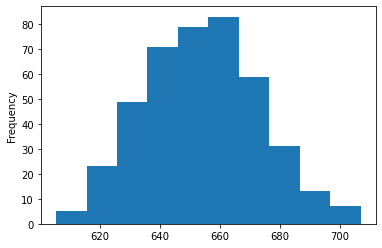

In [10]:
# distribution of our target variable
df.testscr.plot.hist()

Wow, almost normally distributed!

In [11]:
select_kbest(X_train, y_train, 3)

['mealpct', 'avginc', 'elpct']

In [12]:
features, rankings = select_rfe(X_train, y_train, 3, return_rankings=True)

In [13]:
features

['compstu', 'str', 'avginc']

In [14]:
rankings

enrltot     6
teachers    5
calwpct     4
mealpct     2
computer    7
compstu     1
expnstu     8
str         1
avginc      1
elpct       3
dtype: int64

**Takeaways:**
- Seems like the best features would be `avginc`, `str`, `elpct`, `compstu`, `mealpct`

## Modeling

**First let's set the baseline**

In [15]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [16]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict testscr_pred_mean
testscr_pred_mean = y_train.testscr.mean()
y_train['testscr_pred_mean'] = testscr_pred_mean
y_validate['testscr_pred_mean'] = testscr_pred_mean

# 2. compute testscr_pred_median
testscr_pred_median = y_train.testscr.median()
y_train['testscr_pred_median'] = testscr_pred_median
y_validate['testscr_pred_median'] = testscr_pred_median

# 3. RMSE of testscr_pred_mean
rmse_train = mean_squared_error(y_train.testscr, y_train.testscr_pred_mean) ** 0.5
rmse_validate = mean_squared_error(y_validate.testscr, y_validate.testscr_pred_mean) ** 0.5

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of testscr_pred_median
# rmse_train = mean_squared_error(y_train.testscr, y_train.testscr_pred_median) ** .5
# rmse_validate = mean_squared_error(y_validate.testscr, y_validate.testscr_pred_median) ** .5
# print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
#       "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  19.07 
Validate/Out-of-Sample:  19.07


Mean and median are pretty much the same -- let's use mean as the baseline.

In [17]:
######## 
# ~~~~~~~~~addendum~~~~~~~
#  we will incrementally build 
# a dataframe for comparison of 
# our metrics for model selection
######

In [18]:
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.testscr, y_validate.testscr_pred_mean)}])

In [19]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,19.069753,0.0


### LinearRegression (OLS)

1. Fit the model using X_train_scaled and the labels from y_train. 

2. Predict final grade for students in training sample using our model (lm). 

3. Evaluate using RMSE

4. Repeat predictions and evaluation for validation. 

5. Compare RMSE train vs. validation. Overfitting? 

In [21]:
# create the model object
# 
# make the thing
# 
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
# 
# fit the thing
# 
lm.fit(X_train[['avginc', 'str', 'elpct', 'compstu', 'mealpct']], y_train.testscr)

# predict train
# 
# use the thing!
# 
y_train['testscr_pred_lm'] = lm.predict(X_train[['avginc', 'str', 'elpct', 'compstu', 'mealpct']])

# evaluate: rmse
rmse_train = mean_squared_error(y_train.testscr, y_train.testscr_pred_lm) ** (1/2)
# predict validate
y_validate['testscr_pred_lm'] = lm.predict(X_validate[['avginc', 'str', 'elpct', 'compstu', 'mealpct']])

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.testscr, y_validate.testscr_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  8.270071667776442 
Validation/Out-of-Sample:  8.270071667776442


In [22]:
metric_df = metric_df.append(
    {
    'model': 'OLS lm 1',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.testscr, y_validate.testscr_pred_lm)}, ignore_index=True)

In [23]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,19.069753,0.000000
1,OLS lm 1,8.270072,0.811926


### LassoLars

1. Fit the model using X_train_scaled and the labels from y_train. 

2. Predict final grade for students in training sample using our model (lars). 

3. Evaluate using RMSE

4. Repeat predictions and evaluation for validation. 

5. Compare RMSE train vs. validation. Overfitting? 

In [24]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train[['avginc', 'str', 'elpct', 'compstu', 'mealpct']], y_train.testscr)

# predict train
y_train['testscr_pred_lars'] = lars.predict(X_train[['avginc', 'str', 'elpct', 'compstu', 'mealpct']])

# evaluate: rmse
rmse_train = mean_squared_error(y_train.testscr, y_train.testscr_pred_lm) ** (1/2)

# predict validate
y_validate['testscr_pred_lars'] = lars.predict(X_validate[['avginc', 'str', 'elpct', 'compstu', 'mealpct']])

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.testscr, y_validate.testscr_pred_lars) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  8.270071667776442 
Validation/Out-of-Sample:  18.209449375234396


In [25]:
metric_df = metric_df.append(
    {
    'model': 'LassoLars alpha 1',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.testscr, y_validate.testscr_pred_lars)}, ignore_index=True)

In [26]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,19.069753,0.000000
1,OLS lm 1,8.270072,0.811926
2,LassoLars alpha 1,18.209449,0.088192


### TweedieRegressor (GLM)

1. Fit the model using X_train_scaled and the labels from y_train. 

2. Predict final grade for students in training sample using our model (glm). 

3. Evaluate using RMSE

4. Repeat predictions and evaluation for validation. 

5. Compare RMSE train vs. validation. Overfitting? 

In [27]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train[['avginc', 'str', 'elpct', 'compstu', 'mealpct']], y_train.testscr)

# predict train
y_train['testscr_pred_glm'] = glm.predict(X_train[['avginc', 'str', 'elpct', 'compstu', 'mealpct']])

# evaluate: rmse
rmse_train = mean_squared_error(y_train.testscr, y_train.testscr_pred_glm) ** (1/2)

# predict validate
y_validate['testscr_pred_glm'] = glm.predict(X_validate[['avginc', 'str', 'elpct', 'compstu', 'mealpct']])

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.testscr, y_validate.testscr_pred_glm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  8.280850137124208 
Validation/Out-of-Sample:  8.280850137124208


In [28]:
metric_df = metric_df.append(
    {
    'model': 'GLM Model Power 1',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.testscr, y_validate.testscr_pred_glm)}, ignore_index=True)

In [29]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,19.069753,0.000000
1,OLS lm 1,8.270072,0.811926
2,LassoLars alpha 1,18.209449,0.088192
3,GLM Model Power 1,8.280850,0.811436


### Polynomial Regression

Using sklearn.preprocessing.PolynommialFeatures() + sklearn.linear_model.LinearRegression()

1. Create the new features, based on value indicated for degree for train, validate & test. 

2. Fit the Linear Regression model

3. Predict using the transformed (squared or cubed, e.g.) features 

4. Evaluate using RMSE

5. Repeat predictions and evaluation for validation.

6. Compare RMSE train vs. validation. Overfitting?

## **PolynomialFeatures**

In [49]:
# since I'm going to transform my X, I'm going to make a subset that holds just those columns
X_train_subset = X_train[['avginc', 'str', 'elpct', 'compstu', 'mealpct']]
X_validate_subset = X_validate[['avginc', 'str', 'elpct', 'compstu', 'mealpct']]
X_test_subset = X_test[['avginc', 'str', 'elpct', 'compstu', 'mealpct']]

In [50]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_subset)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_subset)
X_test_degree2 = pf.transform(X_test_subset)

## **LinearRegression**

In [39]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.testscr)

# predict train
y_train['testscr_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.testscr, y_train.testscr_pred_lm2) ** (1/2)

# predict validate
y_validate['testscr_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.testscr, y_validate.testscr_pred_lm2) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  7.9633107549730235 
Validation/Out-of-Sample:  7.9633107549730235


In [40]:
metric_df = metric_df.append(
    {
    'model': 'Quadratic Model',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.testscr, y_validate.testscr_pred_lm2)}, ignore_index=True)

In [41]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,19.069753,0.000000
1,OLS lm 1,8.270072,0.811926
2,LassoLars alpha 1,18.209449,0.088192
3,GLM Model Power 1,8.280850,0.811436
4,Quadratic Model,7.963311,0.825620


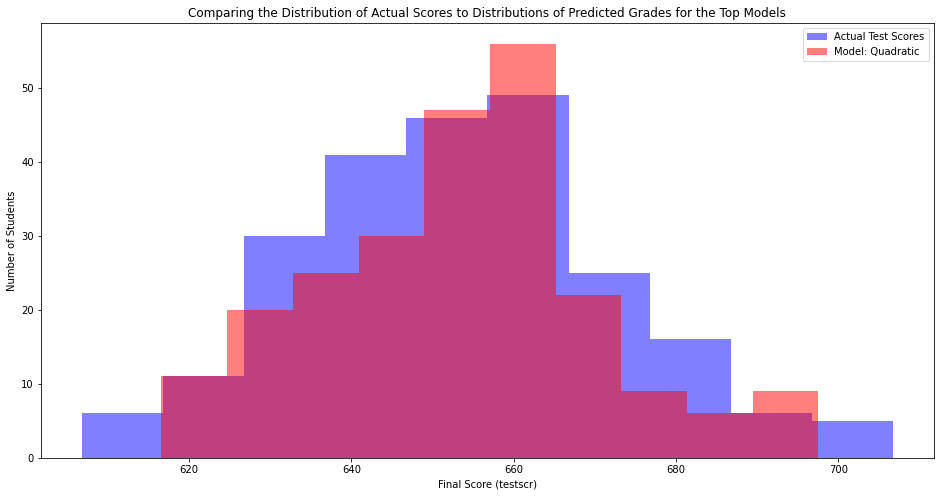

In [42]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.testscr, color='blue', alpha=.5, label="Actual Test Scores")
plt.hist(y_validate.testscr_pred_lm2, color='red', alpha=.5, label="Model: Quadratic")
# plt.hist(y_validate.G3_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
# plt.hist(y_validate.G3_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Final Score (testscr)")
plt.ylabel("Number of Students")
plt.title("Comparing the Distribution of Actual Scores to Distributions of Predicted Grades for the Top Models")
plt.legend()
plt.show()

# Quadratic model wins!

**Model Selection & Out-of-Sample Evaluation**

Model selected: lm2 (using LinearRegression)

In [43]:
type(y_test)

pandas.core.series.Series

In [44]:
y_test = pd.DataFrame(y_test)

In [45]:
y_test.head()

,testscr
382,680.050049
159,647.049988
214,654.849976
259,660.299988
296,664.750000


In [46]:
X_test.head()

,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
382,945,46.000000,4.239900,10.651500,216,0.228571,5088.708008,20.543478,19.34650,2.539683
159,7210,360.350006,26.626801,68.857903,800,0.110957,5158.791992,20.008326,10.09800,15.187240
214,4928,229.199997,8.542000,25.888500,618,0.125406,5139.937500,21.500874,14.62300,5.925324
259,248,11.120000,7.462700,21.268700,51,0.205645,4302.834961,22.302158,15.36500,0.000000
296,9850,489.299988,3.335000,30.643700,1113,0.112995,5081.455566,20.130800,20.87575,18.558376


In [47]:
lm2

LinearRegression(normalize=True)

In [51]:
# predict on test
y_test['testscr_pred_lm2'] = lm2.predict(X_test_degree2)

In [52]:
# evaluate: rmse
rmse_test = mean_squared_error(y_test.testscr, y_test.testscr_pred_lm2) ** 0.5
print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  7.9633107549730235


In [53]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,19.069753,0.000000
1,OLS lm 1,8.270072,0.811926
2,LassoLars alpha 1,18.209449,0.088192
3,GLM Model Power 1,8.280850,0.811436
4,Quadratic Model,7.963311,0.825620
